<a href="https://colab.research.google.com/github/theabdulbasitt/pytorch_tutorial/blob/main/pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import numpy as np



# **Simple  Neural Network**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Creating a Model class  that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n)  -->
  # output

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # initiate or nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [ ]:
# pick a manual seed for randomaization
torch.manual_seed(41)
# creating an instance of our model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# converting label from strings to numbers

df['species'] = df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
df['species'].unique()

<ipython-input-7-197a712e78b2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})


array([0, 1, 2])

In [ ]:
x = df.drop('species',axis=1)
y = df['species']


In [ ]:
# converting x and y to numpy arrays

x = x.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
# converting fetures and label (train, test both ) into tensors

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
 # seting the criterion of model to measure the erorr, how far of the predictios are from the data

criterion = nn.CrossEntropyLoss()

# chossing Adam Optimizer and learning rate ( lr )

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)



In [16]:
# train model
epochs =100
losses = []

for i in range(epochs):
  # go forward and get prediction
  y_pred = model.forward(x_train)
  # measure loss
  loss = criterion(y_pred, y_train)
  # keep track of loss for concept understadning purpose
  losses.append(loss.detach().numpy())


  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  #Do some back propogation: take the error rate of forward propogation and feed it back
  # through  the network to fine tune weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 Loss: 1.123980164527893
Epoch: 10 Loss: 1.026330590248108
Epoch: 20 Loss: 0.8561798334121704
Epoch: 30 Loss: 0.6227018237113953
Epoch: 40 Loss: 0.42110538482666016
Epoch: 50 Loss: 0.28016823530197144
Epoch: 60 Loss: 0.18531975150108337
Epoch: 70 Loss: 0.1269538700580597
Epoch: 80 Loss: 0.09192601591348648
Epoch: 90 Loss: 0.07171893864870071


Text(0.5, 0, 'Epoch')

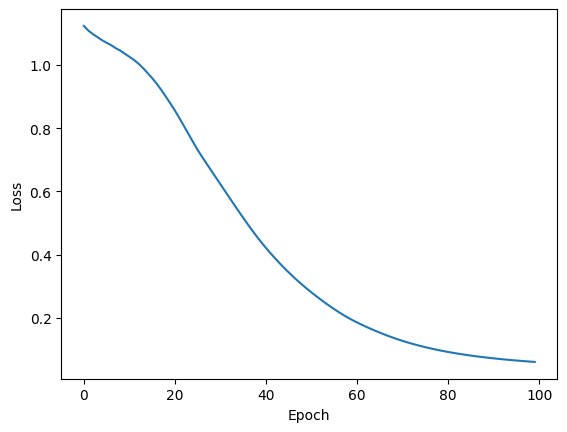

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [18]:
# evaluate model on test dataset
with torch.no_grad(): # turn of back propogation
  y_eval = model.forward(x_test) # x_test are features from our test set
  loss = criterion(y_eval, y_test) # find the loss






In [19]:
loss

tensor(0.0977)

In [22]:
correct =0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    # will tell us what type of flower class our network think it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} ')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([-7.5292,  4.3489,  8.9117]) 	 2 	 2 
2.) tensor([-4.0035,  5.3611,  2.0490]) 	 1 	 1 
3.) tensor([ 5.3561, -3.0653, -3.8639]) 	 0 	 0 
4.) tensor([-10.6325,   4.0513,  14.3028]) 	 2 	 2 
5.) tensor([ 4.9314, -2.6861, -3.5894]) 	 0 	 0 
6.) tensor([-6.2867,  4.5206,  6.7038]) 	 2 	 2 
7.) tensor([-8.1850,  4.8180,  9.4650]) 	 2 	 2 
8.) tensor([-8.8162,  4.7439, 10.5764]) 	 2 	 2 
9.) tensor([ 5.4111, -3.1138, -3.8966]) 	 0 	 0 
10.) tensor([-6.7589,  4.7644,  7.2108]) 	 2 	 2 
11.) tensor([-5.0463,  6.2359,  2.7870]) 	 1 	 1 
12.) tensor([ 5.6026, -3.2850, -4.0212]) 	 0 	 0 
13.) tensor([ 4.9113, -2.6676, -3.5739]) 	 0 	 0 
14.) tensor([ 5.9054, -3.5541, -4.2113]) 	 0 	 0 
15.) tensor([ 6.2215, -3.8390, -4.4288]) 	 0 	 0 
16.) tensor([-6.2669,  4.4973,  6.6889]) 	 2 	 2 
17.) tensor([ 6.6570, -4.2265, -4.7035]) 	 0 	 0 
18.) tensor([ 5.5624, -3.2480, -3.9902]) 	 0 	 0 
19.) tensor([-6.1151,  4.6311,  6.3027]) 	 1 	 2 
20.) tensor([ 5.5313, -3.2209, -3.9731]) 	 0 	 0 
21.) t